# Regression tree

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Movie_regression.csv', header = 0)

In [3]:
df.head(3)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400


In [4]:
df.info() #check data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

## Data preprocessing
### 1. Missing Value Imputation

In [5]:
df['Time_taken'].mean()

157.39149797570855

In [6]:
df['Time_taken'].fillna(value = df['Time_taken'].mean(), inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

### 2. Dummy variables

In [8]:
df = pd.get_dummies(df, ["3D_available","Genre"],drop_first = True)

In [9]:
df.head(3)

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0


### 3. x-y split
* spit in to x (independent) and y (dependent) variables

In [10]:
x = df.loc[:, df.columns != 'Collection'] #dataframe

In [11]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [12]:
y = df['Collection'] #series

### 4. train-test split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=0)

In [15]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(404, 19) (102, 19) (404,) (102,)


## Training regression tree

In [16]:
from sklearn import tree
regtree = tree.DecisionTreeRegressor(max_depth = 3)

In [17]:
regtree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

## Predict values using training model

In [18]:
y_train_pred = regtree.predict(x_train)
y_test_pred = regtree.predict(x_test)

In [19]:
y_test_pred

array([ 46187.35632184, 100000.        ,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  23514.28571429,  23514.28571429,
        23514.28571429,  23514.28571429,  91860.86956522,  65183.33333333,
        46187.35632184,  65183.33333333,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  46187.35632184,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        91860.86956522,  35137.77777778,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  35137.77777778,
        23514.28571429, 100000.        ,  23514.28571429,  23514.28571429,
        46187.35632184,  46187.35632184,  46187.35632184,  23514.28571429,
        46187.35632184,  46187.35632184,  35137.77777778,  35137.77777778,
        35137.77777778,  46187.35632184,  35137.77777778,  35137.77777778,
        46187.35632184,  

## Model performance

In [20]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix

In [21]:
MSE = mean_squared_error(y_test, y_test_pred)

In [22]:
MSE

111364081.74002264

In [23]:
mean_squared_error(y_train, y_train_pred)

55636391.90989135

In [24]:
r2_score(y_test, y_test_pred)

0.6540678457568934

In [25]:
r2_score(y_train, y_train_pred)

0.8364651040556869

## Plot decision tree

In [26]:
dot_data = tree.export_graphviz(regtree, out_file=None,feature_names= x_train.columns, filled = True)

In [27]:
from IPython.display import Image

In [28]:
import pydotplus

In [29]:
#!pip install graphviz
#!conda install graphviz

In [30]:
#!brew install graphviz

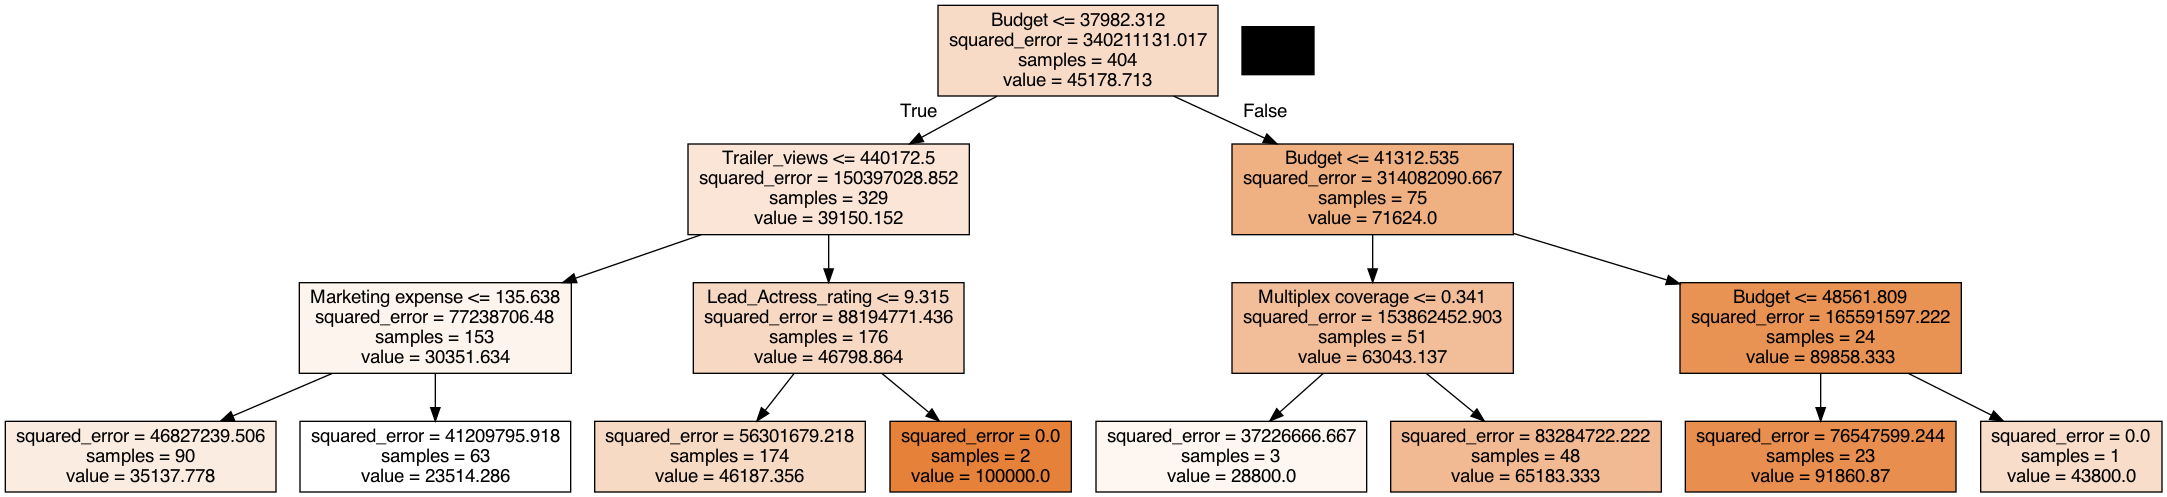

In [31]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [32]:
x_train.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       '3D_available_YES', 'Genre_Comedy', 'Genre_Drama', 'Genre_Thriller'],
      dtype='object')

## Controling tree growth

### 1. Maximum number of levels in tree

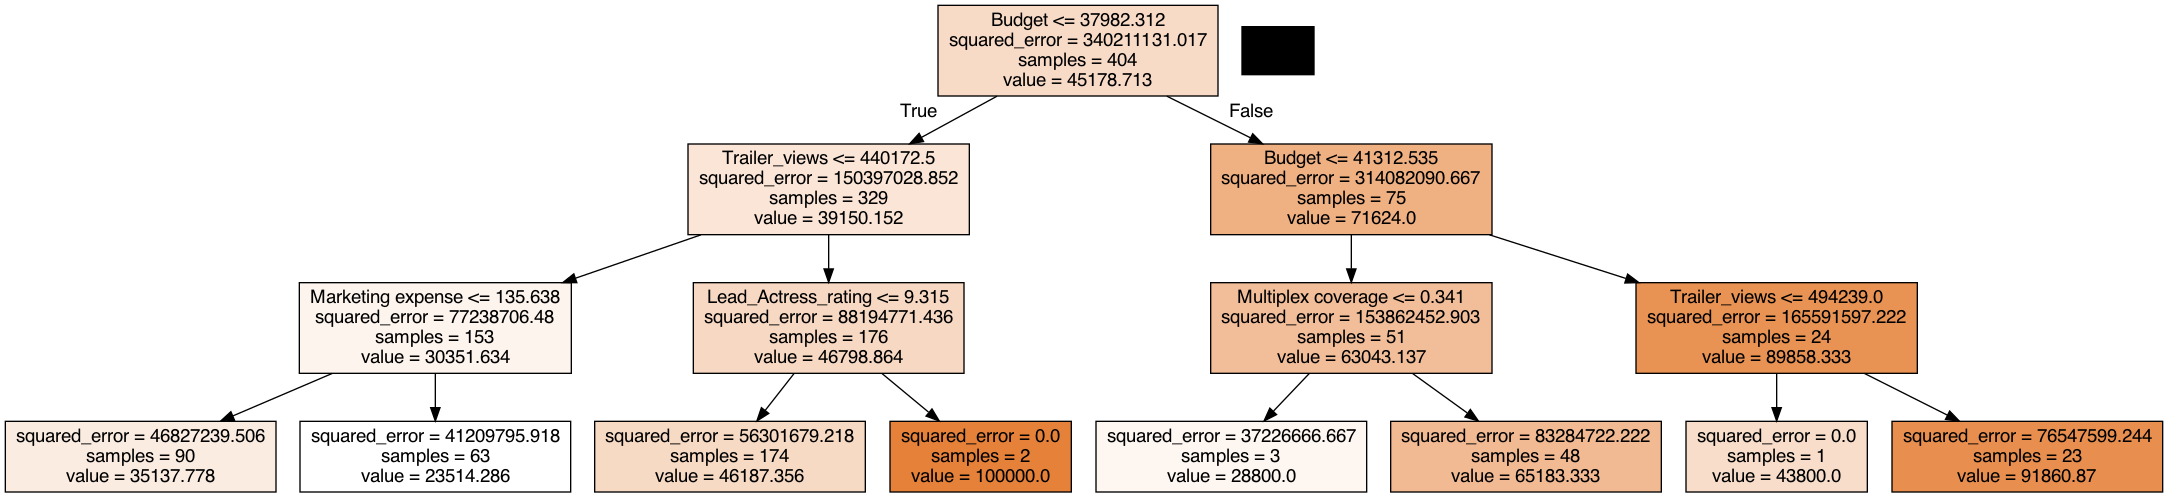

In [33]:
regtree1 = tree.DecisionTreeRegressor(max_depth = 3)
regtree1.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree1, out_file=None,feature_names= x_train.columns, filled = True)
graph1 = pydotplus.graph_from_dot_data(dot_data)
Image(graph1.create_png())

### 2. Minimum observations at an internal node

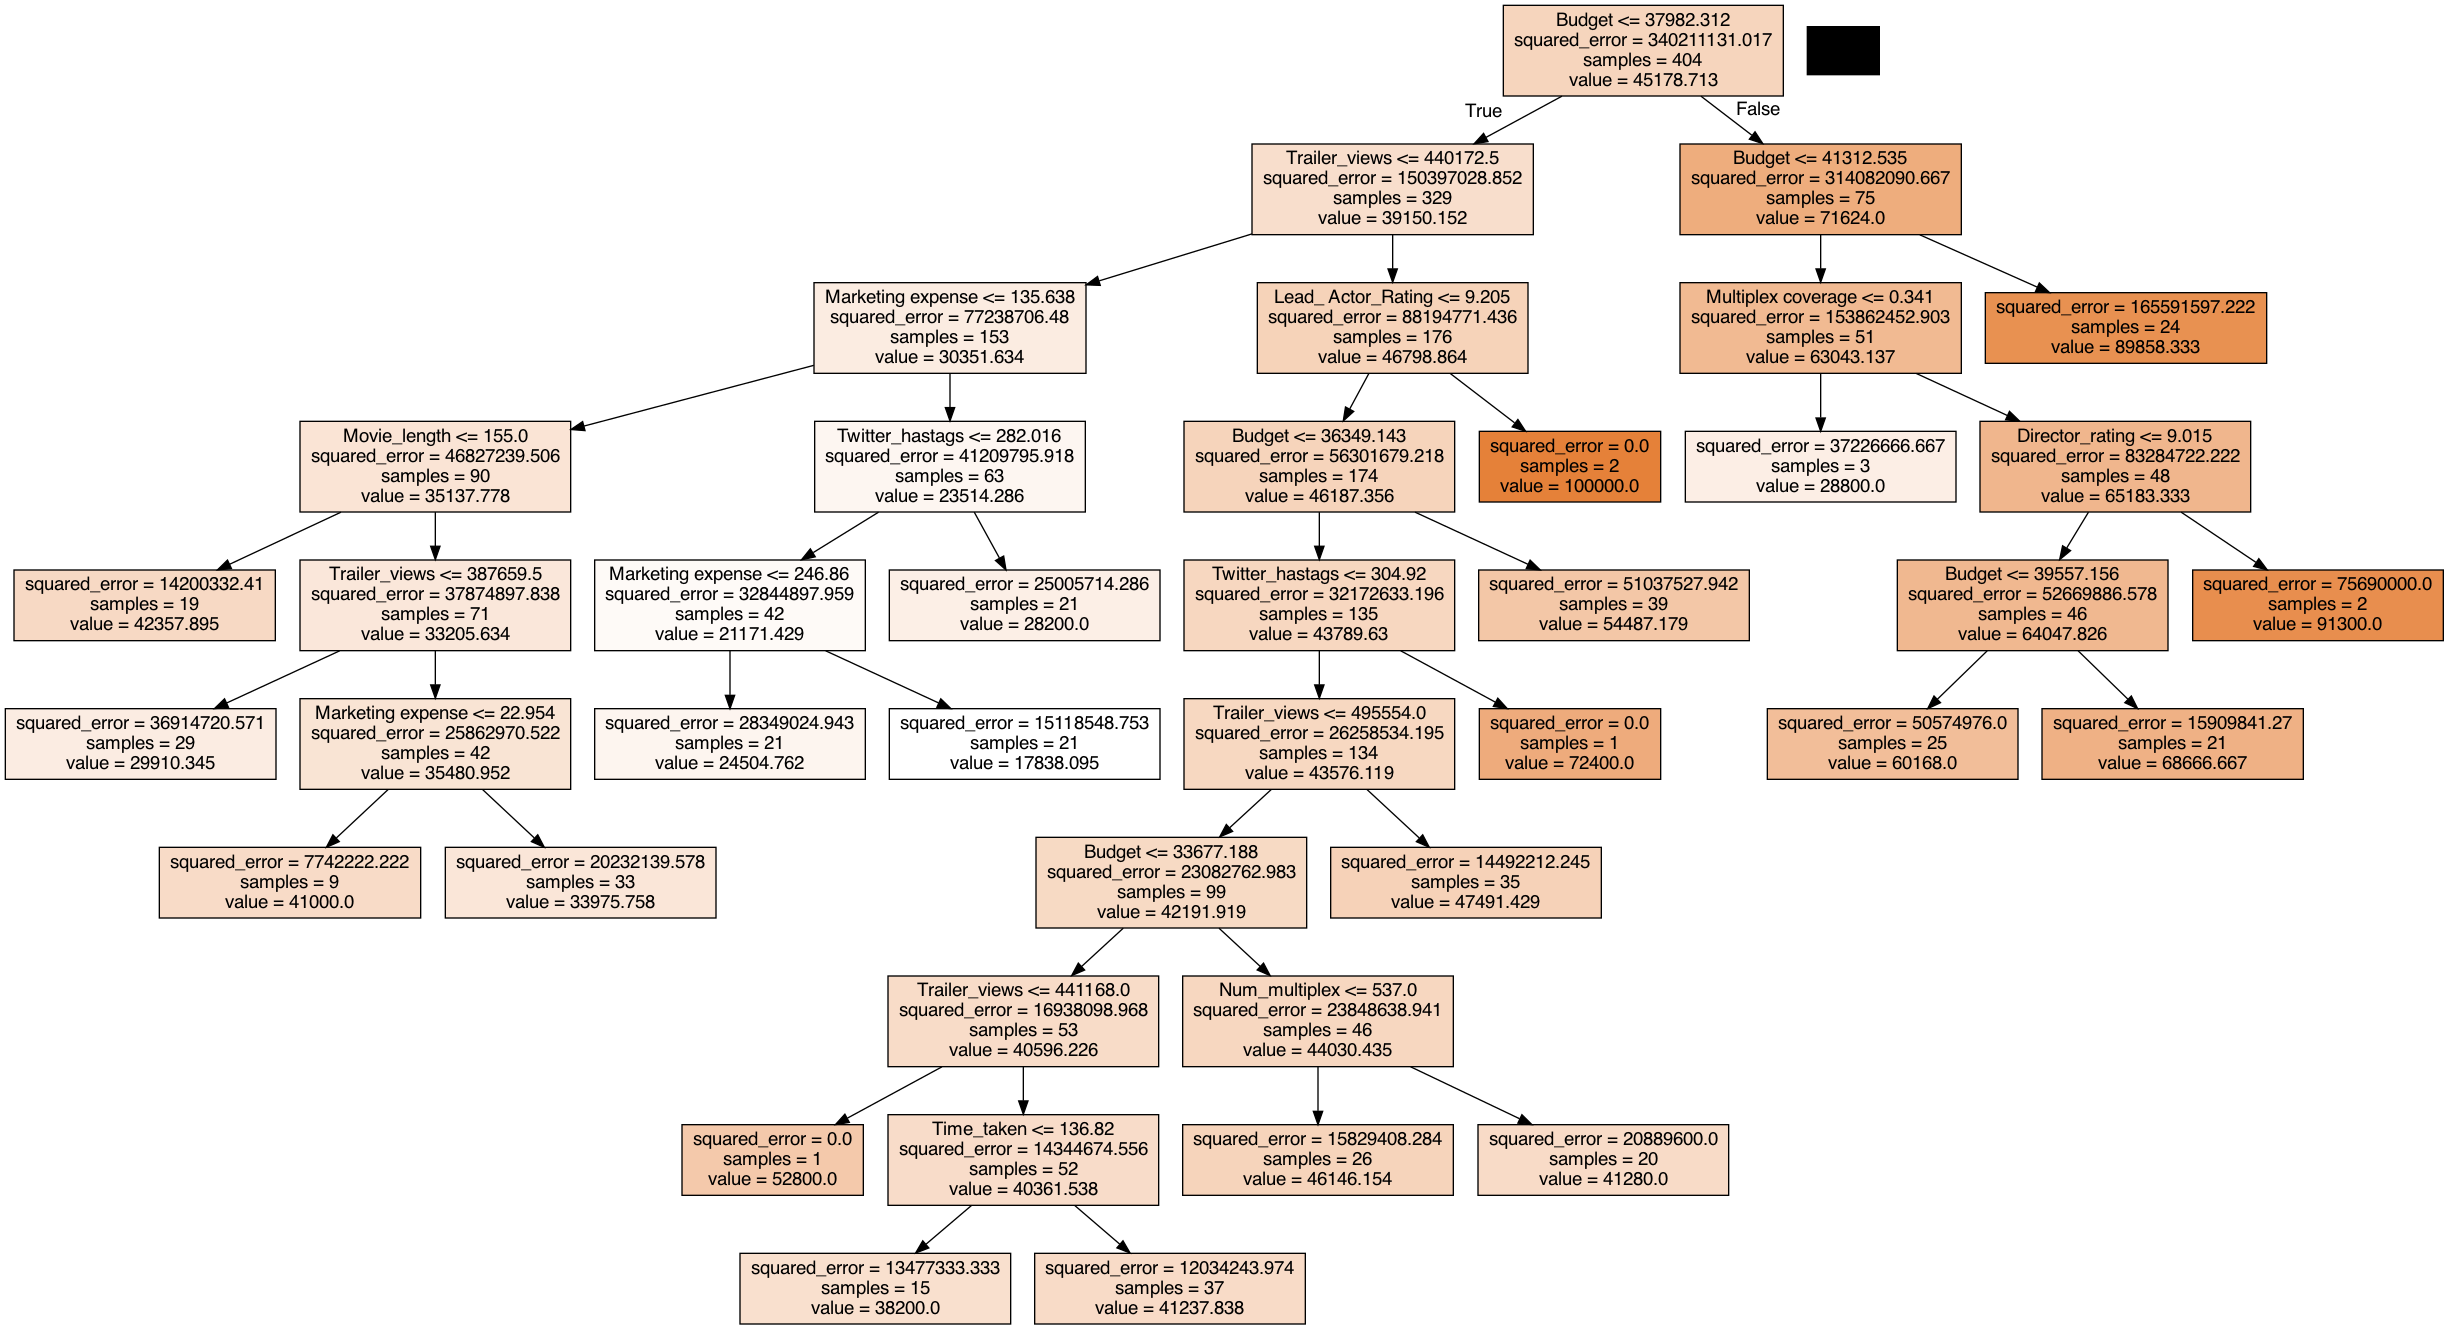

In [34]:
regtree2 = tree.DecisionTreeRegressor(min_samples_split = 40)
#if sample size is less  than 40, stop splitting
regtree2.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree2, out_file=None,feature_names= x_train.columns, filled = True)
graph2 = pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

### 3. Minimun observations at a leaf node

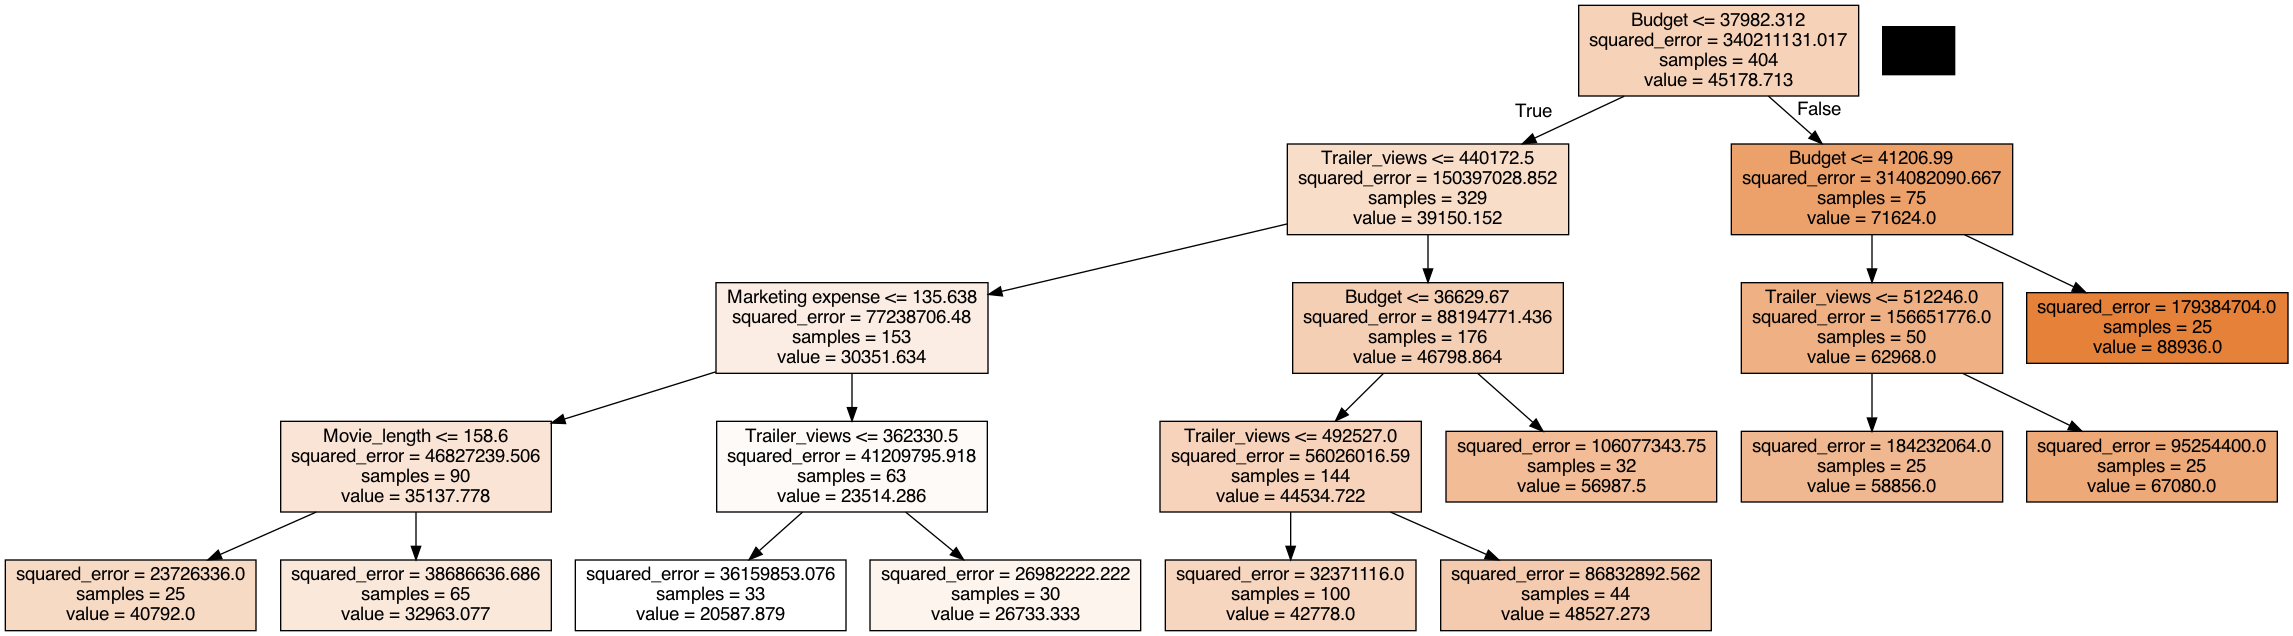

In [37]:
regtree3 = tree.DecisionTreeRegressor(min_samples_leaf = 25, max_depth=4)
#sample size can not be less than 25
regtree3.fit(x_train, y_train)
dot_data = tree.export_graphviz(regtree3, out_file=None,feature_names= x_train.columns, filled = True)
graph3 = pydotplus.graph_from_dot_data(dot_data)
Image(graph3.create_png())

In [38]:
graph1.write_png("max_level.png")
graph2.write_png("min_split_40.png")
graph3.write_png("min_sample_25.png")

True

# Ensemble method

# 1. Bagging
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [34]:
regtree = tree.DecisionTreeRegressor()

In [35]:
from sklearn.ensemble import BaggingClassifier

In [36]:
bag_regtree = BaggingClassifier(base_estimator=regtree, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)
#n_estimators = 1000 means building 1000 decision tree models

In [37]:
bag_regtree.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeRegressor(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

## 2. Random Forest

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf_reg = RandomForestClassifier(n_estimators=1000, n_jobs=-1 ,random_state=42)
#we know the m - number of selected predictor
#since it's classification model, m = sqrt(20)

In [40]:
rf_reg.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [41]:
confusion_matrix(y_test, rf_reg.predict(x_test))

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 4]])

In [42]:
mean_squared_error(y_test, rf_reg.predict(x_test))

118210196.07843137

In [43]:
r2_score(y_test, rf_reg.predict(x_test))

0.6328016435463002

### Grid Search
* a way to input more than one parameters in a model
* try various models in the same order

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [44]:
from sklearn.model_selection import GridSearchCV

In [45]:
rf_reg_gs = RandomForestClassifier(n_estimators=250,random_state=42)

In [46]:
params_grid = {"max_features" : [4,5,6,7,8,9,10],
              "min_samples_split": [2, 3, 10],
              }

In [47]:
grid_search = GridSearchCV(rf_reg_gs, params_grid,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [81]:
grid_search.fit(x_train, y_train)

/Users/yuquanli/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [82]:
grid_search.best_params_ 

{'max_features': 10, 'min_samples_split': 2}

In [83]:
cvrf_reg_gs = grid_search.best_estimator_

In [85]:
mean_squared_error(y_test, cvrf_reg_gs.predict(x_test))

116058823.52941176

In [86]:
r2_score(y_test, cvrf_reg_gs.predict(x_test))

0.6394844889380417

## 3. Boosting

### 3.1 Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
gbc_reg = GradientBoostingClassifier()
gbc_reg.fit(x_train, y_train)
#default value of parameters

GradientBoostingClassifier()

In [89]:
mean_squared_error(y_test, gbc_reg.predict(x_test))

179640784.3137255

In [90]:
gbc_reg2 = GradientBoostingClassifier(learning_rate =0.02, n_estimators =1000, max_depth = 1)
gbc_reg2.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [91]:
mean_squared_error(y_test, gbc_reg2.predict(x_test))

139892941.17647058

### 3.2 Ada Boost

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [92]:
from sklearn.ensemble import AdaBoostClassifier

In [93]:
ada_reg = AdaBoostClassifier(learning_rate =0.02, n_estimators =5000)

In [94]:
ada_reg.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [95]:
mean_squared_error(y_test, ada_reg.predict(x_test))

244201568.62745097

In [97]:
ada_reg2 = AdaBoostClassifier(rf_reg_gs,learning_rate =0.05, n_estimators =500)
#new objective using the rf_clf model from grid search

In [98]:
ada_reg2.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [99]:
mean_squared_error(y_test, ada_reg2.predict(x_test))

81430196.07843137

### 3.3 XG Boost
http://xgboost.readthedocs.io/en/latest/

#### Prameter Tuning

1. General Parameters: Guide the overall functioning
2. Booster Parameters: Guide the individual booster (tree/regression) at each step
3. Learning Task Parameters: Guide the optimization performed

In [48]:
import xgboost as xgb

In [49]:
xgb_reg = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3,
                            n_jobs=-1)

In [ ]:
xgb_reg.fit(x_train, y_train)

/Users/yuquanli/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:37:32] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
accuracy_score(y_test, xgb_clf.predict(x_test))

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
xgb_clf = xgb.XGBClassifier(n_estimators=250,learning_rate=0.1, random_state=42)

In [ ]:
param_test1 = {
 'max_depth':range(3,10,2),
    'gamma' : [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[ 1e-2, 0.1, 1]
}

In [ ]:
grid_search = GridSearchCV(xgb_clf, param_test1,
                           n_jobs=-1, cv=5, scoring='accuracy')

In [ ]:
grid_search.fit(x_train, y_train)

In [ ]:
cvxg_clf = grid_search.best_estimator_

In [ ]:
accuracy_score(y_test, cvxg_clf.predict(x_test))

In [ ]:
grid_search.best_params_